In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("./train.csv")
x = data_train[data_train.columns[0]]
y = data_train[data_train.columns[1]]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

x_train = x_train.to_numpy().reshape(-1, 1)
x_val = x_val.to_numpy().reshape(-1, 1)
x_test = pd.read_csv("./test.csv").to_numpy().reshape(-1, 1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape)

(61442, 1) (20481, 1) (20481, 1)
(61442,) (20481,)


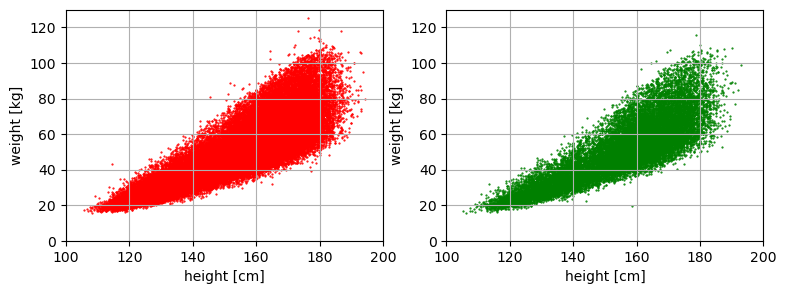

In [3]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, s=0.3, color='r')
plt.xlabel("height [cm]")
plt.ylabel("weight [kg]")
plt.xlim([100, 200])
plt.ylim([0, 130])
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(x_val, y_val, s=0.3, color='g')
plt.xlabel("height [cm]")
plt.ylabel("weight [kg]")
plt.xlim([100, 200])
plt.ylim([0, 130])
plt.grid()

plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test) # Baseline 성능 평가에 활용

print("계수:", lr.coef_)
print("절편:", lr.intercept_)

print("학습용:", lr.score(x_train, y_train))
print("검증용:", lr.score(x_val, y_val))

계수: [0.86973076]
절편: -83.39955184538275
학습용: 0.7152077812335236
검증용: 0.7162096703017845


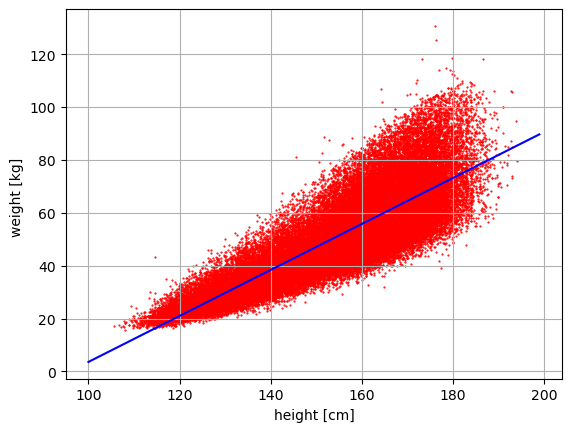

In [5]:
a = lr.coef_
b = lr.intercept_

height_tmp = np.arange(100, 200, 1)
weight_tmp = a * height_tmp + b

plt.figure()
plt.scatter(x_train, y_train, s=0.3, color='r')
plt.plot(height_tmp, weight_tmp, color='b')
plt.xlabel("height [cm]")
plt.ylabel("weight [kg] ")
plt.grid()
plt.show()